In [6]:
from modelo_tweets import *

In [7]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')
masas=pd.read_csv('entradas/masas.csv')
masas.fecha=pd.to_datetime(masas.fecha)

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([        
                     t.weekday()/6.0,
                     (t.hour > 12)*1,
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),   
#                      np.nan_to_num(masas[masas.fecha == pd.Timestamp(t.date())].CreatedAt.mean()),
                     1
                    ])

In [8]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [9]:
with open('errors_covariados_blocking2.pickle', 'rb') as f:
    x = pickle.load(f)

In [35]:
values={}
for idx,period in enumerate(x):
    train_period,validate_period=period
    results={}
    for comb in x[period][0]:
        results[comb]=x[period][0][comb]['Pearson']
    key_max=min(results,key=results.get)
    func = lambda x: TC(x)[np.array(key_max+(6,))]
    model=modelTweets(data,
                      train_period,
                      validate_period,
                      f_covariates=(func,restore_date),
                      followers_rate=3,
                      win_size_pred_period=1
                     )
    model.compute_Beta()
#     model.train()
#     model.compute_lambda_predict()
#     model.compute_errors()
#     MAE_=model.errors_predict['RMSE']
#     Pearson_=model.errors_predict['Pearson']
    model.poisson_method()
    model.compute_errors(model.poisson_predictions)
    A=model.errors_predict['Pearson']
    model.linear_reg_method()
    model.compute_errors(model.linear_predictions)
    B=model.errors_predict['Pearson']
#     model.errors_predict['MAPE']
#     model.errors_predict_cum['MAPE']
    values[idx]=[results[comb],A,B]
    print(values)
    print("-"*15)

2.714276324312994e-09
[30. 18.  0. 60.]
2.714276324312994e-09


/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:894: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306]}
---------------
5.880558528224077e-09
[ 7.  0. 14.]
5.880558528224077e-09


/u01/user8/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306], 1: [0.26228673433651106, nan, 0.033777174124663266]}
---------------
1.5683326637372375e-08
[0. 1.]
1.5683326637372375e-08
{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306], 1: [0.26228673433651106, nan, 0.033777174124663266], 2: [0.18633973660249833, nan, 0.09385263721652448]}
---------------
5.056891085210956e-09
[31. 31. 10.  0.  0. 62.]
5.056891085210956e-09
{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306], 1: [0.26228673433651106, nan, 0.033777174124663266], 2: [0.18633973660249833, nan, 0.09385263721652448], 3: [0.09540749427234128, 0.13107604076160395, 0.08905899595057795]}
---------------
3.2866823986229834e-10
[0. 1. 3.]
3.2866823986229834e-10
{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306], 1: [0.26228673433651106, nan, 0.033777174124663266], 2: [0.18633973660249833, nan, 0.09385263721652448], 3: [0.09540749427234128, 0.13107604076160395, 0.08905899595057795],

5.341944229044807e-09
[15.5  4.   0.  30. ]
5.341944229044807e-09
{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306], 1: [0.26228673433651106, nan, 0.033777174124663266], 2: [0.18633973660249833, nan, 0.09385263721652448], 3: [0.09540749427234128, 0.13107604076160395, 0.08905899595057795], 4: [0.4054011256019297, 0.48094381230182837, 0.1461865536820989], 5: [0.2455990375465012, 0.21123497080481257, 0.055621534392237236], 6: [0.05929625498672344, 0.21056713435615945, 0.06263361265373715], 7: [0.22286721076790336, 0.002123295785092779, 0.07285486160479723], 8: [0.10435893012974584, 0.1768353000082866, 0.10257957922106639], 9: [0.3496738702362186, 0.11067311224175977, 0.07413869255600435], 10: [0.17315284857185964, 0.13268292105471813, 0.06875407634917455], 11: [0.00484000482128321, 0.02984748356222893, 0.019569957841894844], 12: [0.29788155580242165, 0.02301612758192687, 0.07114132877588297], 13: [0.009565645093033225, 0.33134763243711884, 0.22881620590782942], 14: [0.0499

In [36]:
values

{0: [0.2141247712368903, 0.2209989810148619, 0.14514438226594306],
 1: [0.26228673433651106, nan, 0.033777174124663266],
 2: [0.18633973660249833, nan, 0.09385263721652448],
 3: [0.09540749427234128, 0.13107604076160395, 0.08905899595057795],
 4: [0.4054011256019297, 0.48094381230182837, 0.1461865536820989],
 5: [0.2455990375465012, 0.21123497080481257, 0.055621534392237236],
 6: [0.05929625498672344, 0.21056713435615945, 0.06263361265373715],
 7: [0.22286721076790336, 0.002123295785092779, 0.07285486160479723],
 8: [0.10435893012974584, 0.1768353000082866, 0.10257957922106639],
 9: [0.3496738702362186, 0.11067311224175977, 0.07413869255600435],
 10: [0.17315284857185964, 0.13268292105471813, 0.06875407634917455],
 11: [0.00484000482128321, 0.02984748356222893, 0.019569957841894844],
 12: [0.29788155580242165, 0.02301612758192687, 0.07114132877588297],
 13: [0.009565645093033225, 0.33134763243711884, 0.22881620590782942],
 14: [0.049994465889917405, nan, 0.015648472761433233],
 15: [0.

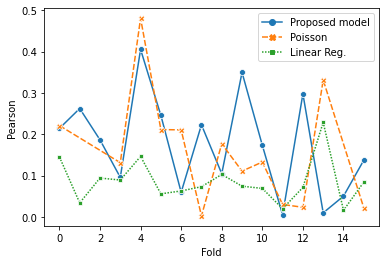

In [40]:
comp_mod=pd.DataFrame(values,index=['Proposed model','Poisson','Linear Reg.']).T
ax=sns.lineplot(data=comp_mod,markers=True, dashes=True)
ax.set(xlabel='Fold', ylabel='Pearson')
ax.get_figure().savefig('results/figures/comp_models_pearson.pdf')

In [38]:
comp_mod.std(axis=0)

Proposed model    0.119258
Poisson           0.137030
Linear Reg.       0.053071
dtype: float64

In [39]:
comp_mod.mean(axis=0)

Proposed model    0.176113
Poisson           0.160233
Linear Reg.       0.085235
dtype: float64

In [7]:
train_period=('2019-05-01 00:00','2019-05-15 00:00')
validate_period=('2019-05-15 00:00','2019-06-01 00:00')
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=1,
                  win_size_pred_period=1
                 )

In [9]:
model.real_tweets_validate

,start,end,Tweets
0,1393.223333,1394.225790,25
1,1394.225790,1395.228247,37
2,1395.228247,1396.230704,31
3,1396.230704,1397.233161,23
4,1397.233161,1398.235618,19
...,...,...,...
402,1796.211048,1797.213505,1
403,1797.213505,1798.215962,8
404,1798.215962,1799.218419,26
405,1799.218419,1800.220876,12


In [8]:
model.poisson_method()

,start,end,Tweets
0,1393.223333,1394.225790,22.195264
1,1394.225790,1395.228247,22.195264
2,1395.228247,1396.230704,22.195264
3,1396.230704,1397.233161,22.195264
4,1397.233161,1398.235618,22.195264
...,...,...,...
402,1796.211048,1797.213505,8.241183
403,1797.213505,1798.215962,8.241183
404,1798.215962,1799.218419,8.241183
405,1799.218419,1800.220876,8.241183


In [14]:
A,B = model.compute_errors(model.poisson_predictions)

In [10]:
model.train()

103.91277882821677
[14. 14.  6.  6.  0.  4. 28.]
103.91277882821677


(array([-0.50796182, -0.51147684,  4.86283669, -4.21839115,  0.        ,
        -5.20825709,  2.27365143]),
 array([ 1.54420386e-02, -9.21879903e+01,  2.74548977e+00]),
 0.11812796144974476,
 array([16.06609646, 15.15700395, 19.68791502,  8.98144247, 10.1150582 ,
        10.2287779 , 14.25452607,  6.94834059, 11.36101853, 11.02934074,
         9.08057105,  9.40328278,  7.07632242,  4.93452504,  3.82659353,
         5.81703312,  3.6830466 ,  3.56587823,  3.52429581,  3.50496527,
         8.03890083,  4.47725319,  8.30804065, 11.88524584, 13.97301208,
        11.35935884, 11.36645013, 13.09145175, 19.75261689, 12.03007687,
        11.32814251, 14.4829013 ,  9.28334928, 11.94848475, 14.10894818,
        13.46924558,  9.89618912,  9.58921045,  7.72447162,  5.16116758,
         5.4898767 ,  5.12977817,  4.67781026,  4.59683417,  4.58575472,
        10.50135523, 18.24638596, 16.13333197, 21.79470222, 27.37775857,
        18.38715627, 11.14382493, 13.62610759, 11.87479501, 12.17684822,
     

In [11]:
model.compute_lambda_predict()

(array([9.31713494e+00, 2.56344080e+00, 1.71354353e+00, 6.27679867e-01,
        4.31461401e-01, 3.84529642e-01, 2.08308715e-01, 1.74365612e-01,
        1.47640068e-01, 1.62254847e-01, 1.39470599e-01, 1.32281208e-01,
        1.28296504e-01, 7.94503325e-02, 7.46716803e-02, 7.37656105e-02,
        7.31976659e-02, 7.28909007e-02, 7.27681057e-02, 7.26078314e-02,
        7.30254217e-02, 7.25281023e-02, 7.26267196e-02, 7.26482178e-02,
        7.53588786e+00, 7.53586540e+00, 7.53602793e+00, 7.53585569e+00,
        9.29309000e+00, 2.85169897e+01, 3.86289011e+01, 4.05805340e+01,
        4.08767024e+01, 3.72936369e+01, 3.94199878e+01, 4.07802930e+01,
        4.37002606e+01, 3.47219812e+01, 3.14875335e+01, 2.32483804e+01,
        2.78533692e+01, 2.82025405e+01, 2.45325437e+01, 2.90408544e+01,
        3.02539606e+01, 2.70682975e+01, 3.11629312e+01, 3.63604226e+01,
        4.96225316e+01, 4.94287274e+01, 4.44220824e+01, 5.36106446e+01,
        4.72941901e+01, 5.02653613e+01, 5.42230805e+01, 4.960448

In [24]:
model.compute_errors()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:832: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


({'APE': array([6.27314602e-01, 9.30717816e-01, 9.44724402e-01, 9.72709571e-01,
         9.77291505e-01, 9.72533597e-01, 9.73961411e-01, 9.84148581e-01,
         9.86578176e-01, 9.86478763e-01, 9.87320855e-01, 9.86771879e-01,
         9.67925874e-01, 9.60274834e-01, 9.25328320e-01,            inf,
                    inf, 9.27109099e-01, 9.27231894e-01, 9.75797390e-01,
         9.96957274e-01, 9.96373595e-01, 9.95965182e-01, 9.94810842e-01,
         5.56712479e-01, 4.20318046e-01, 4.61712290e-01, 2.55975949e-01,
         8.58618000e-01, 2.75169897e+01, 3.29210012e+00, 5.76342234e+00,
         9.21917560e+00, 5.21560614e+00, 3.92749848e+00, 7.15605860e+00,
         7.74005212e+00, 3.34024765e+00,            inf,            inf,
         2.68533692e+01,            inf,            inf, 8.68028479e+00,
         1.32722774e+00, 6.91768596e-01, 2.89536640e+00, 1.79695559e+00,
         1.61171219e+00, 8.30693609e-01, 1.46789347e+00, 1.33089759e+00,
         1.48916790e+00, 4.58504014e+00, 1.8

In [25]:
A['Pearson']

0.2591197050815347

In [26]:
A['MAE']

14.303944774501378

In [27]:
model.errors_predict['MAE']

20.971106309451866

In [28]:
model.errors_predict['Pearson']

0.3535903240728596

In [29]:
B['MAPE']

0.3200472401749404

In [30]:
model.errors_predict_cum['MAPE']

0.5817299755780498

In [31]:
model.Tweets_pred

,start,end,Tweets
0,1393.223333,1394.225790,9.317135
1,1394.225790,1395.228247,2.563441
2,1395.228247,1396.230704,1.713544
3,1396.230704,1397.233161,0.627680
4,1397.233161,1398.235618,0.431461
...,...,...,...
402,1796.211048,1797.213505,26.164069
403,1797.213505,1798.215962,27.872726
404,1798.215962,1799.218419,25.800792
405,1799.218419,1800.220876,19.157744
